# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 36.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 102.8 MB/s eta 0:00:0000:01
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sigstore 3.6.1 requires rich~=13.0, but you have rich 14.0.0 which is incompatible.
datasets 3.5.0 requires fsspec[http]<=2024.

# Downloading the Dataset from Roboflow

In [6]:
from roboflow import Roboflow
rf =Roboflow(api_key='VuPyeUvBgaU9AJvZtnwp')
project=rf.workspace('joseph-nelson').project('mask-wearing')

version=project.version(19)
dataset=version.download('yolo11')

loading Roboflow workspace...
loading Roboflow project...

Version export complete for yolo11 format



Extracting Dataset Version Zip to Mask-Wearing-19 in yolo11:: 100%|██████████| 3880/3880 [00:00<00:00, 5617.88it/s]


In [7]:
%pip install ultralytics


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 25.6 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.1 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 3.2 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.0 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.5 MB/s eta 0:00:000:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existin

In [8]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.127 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6281.8/8062.4 GB disk)


# Editing the Paths in (data.yaml) file

In [9]:
import yaml

with open('/kaggle/working/Mask-Wearing-19/data.yaml','r') as file:
    data=yaml.safe_load(file)

print(data)

{'train': '../train/images', 'val': '../valid/images', 'test': '../test/images', 'nc': 2, 'names': ['mask', 'no-mask'], 'roboflow': {'workspace': 'joseph-nelson', 'project': 'mask-wearing', 'version': 19, 'license': 'Public Domain', 'url': 'https://universe.roboflow.com/joseph-nelson/mask-wearing/dataset/19'}}


In [10]:
data['train']='/kaggle/working/Mask-Wearing-19/train/images'
data['val']='/kaggle/working/Mask-Wearing-19/valid/images'
data['test']='/kaggle/working/Mask-Wearing-19/test/images'

print(data)

{'train': '/kaggle/working/Mask-Wearing-19/train/images', 'val': '/kaggle/working/Mask-Wearing-19/valid/images', 'test': '/kaggle/working/Mask-Wearing-19/test/images', 'nc': 2, 'names': ['mask', 'no-mask'], 'roboflow': {'workspace': 'joseph-nelson', 'project': 'mask-wearing', 'version': 19, 'license': 'Public Domain', 'url': 'https://universe.roboflow.com/joseph-nelson/mask-wearing/dataset/19'}}


# Training the YOLO11 Model

In [13]:
from ultralytics import YOLO
model=YOLO('yolo11n.pt')
results=model.train(data='/kaggle/working/Mask-Wearing-19/data.yaml',imgsz=640,epochs=100,batch=16)

Ultralytics 8.3.127 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/Mask-Wearing-19/data.yaml, degrees=0.0, deterministic=True, device=cuda:0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plot

100%|██████████| 755k/755k [00:00<00:00, 26.0MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/working/Mask-Wearing-19/train/labels... 1366 images, 193 backgrounds, 0 corrupt: 100%|██████████| 1366/1366 [00:00<00:00, 1533.80it/s]

train: New cache created: /kaggle/working/Mask-Wearing-19/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 573.3±281.9 MB/s, size: 54.0 KB)


val: Scanning /kaggle/working/Mask-Wearing-19/valid/labels... 368 images, 56 backgrounds, 0 corrupt: 100%|██████████| 368/368 [00:00<00:00, 1504.16it/s]

val: New cache created: /kaggle/working/Mask-Wearing-19/valid/labels.cache


Plotting labels to runs/detect/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train2
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.91G      1.475      2.607      1.468         11        640: 100%|██████████| 86/86 [00:20<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.23it/s]


                   all        368        709      0.769      0.291      0.525      0.273

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.92G      1.403       1.87      1.386         32        640: 100%|██████████| 86/86 [00:18<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]

                   all        368        709      0.587      0.525      0.571      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.92G      1.442      1.686      1.401         21        640: 100%|██████████| 86/86 [00:18<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.11it/s]

                   all        368        709      0.565      0.597      0.625      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.92G      1.461      1.543      1.401         36        640: 100%|██████████| 86/86 [00:18<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.39it/s]

                   all        368        709      0.676      0.578      0.635       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.24G      1.385      1.378      1.352         20        640: 100%|██████████| 86/86 [00:18<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.71it/s]

                   all        368        709      0.774      0.641      0.727      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.24G      1.359      1.297      1.355         23        640: 100%|██████████| 86/86 [00:18<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.61it/s]

                   all        368        709       0.67      0.568      0.625      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.24G      1.328      1.209      1.333         32        640: 100%|██████████| 86/86 [00:18<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.51it/s]

                   all        368        709      0.741      0.695      0.781      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.24G      1.291       1.16      1.319          8        640: 100%|██████████| 86/86 [00:18<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.28it/s]

                   all        368        709      0.829      0.765      0.828      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.24G      1.273      1.084      1.295         35        640: 100%|██████████| 86/86 [00:18<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.52it/s]

                   all        368        709      0.799      0.686       0.76      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.24G      1.272      1.055      1.286         15        640: 100%|██████████| 86/86 [00:18<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.64it/s]

                   all        368        709      0.846       0.73      0.826      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.24G      1.238      1.032      1.265         27        640: 100%|██████████| 86/86 [00:18<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.61it/s]

                   all        368        709      0.821      0.747      0.823      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.24G      1.238      1.008      1.291         13        640: 100%|██████████| 86/86 [00:18<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.06it/s]

                   all        368        709      0.926      0.744      0.848      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.24G      1.224     0.9703      1.262         14        640: 100%|██████████| 86/86 [00:18<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.70it/s]

                   all        368        709      0.893      0.814      0.874      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.24G      1.179     0.9464      1.241         14        640: 100%|██████████| 86/86 [00:18<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.73it/s]

                   all        368        709       0.91      0.742      0.861      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.24G      1.155     0.9376      1.233         15        640: 100%|██████████| 86/86 [00:18<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.81it/s]

                   all        368        709      0.858      0.791       0.85      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.24G      1.182     0.9208      1.244          8        640: 100%|██████████| 86/86 [00:18<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.52it/s]

                   all        368        709      0.835      0.811       0.87      0.575



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.24G      1.142     0.8726      1.223         34        640: 100%|██████████| 86/86 [00:18<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.75it/s]

                   all        368        709       0.88      0.799      0.869      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.24G       1.15      0.873      1.199         16        640: 100%|██████████| 86/86 [00:18<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.65it/s]

                   all        368        709      0.803      0.752      0.818      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.24G      1.122     0.8321      1.196         22        640: 100%|██████████| 86/86 [00:18<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.76it/s]

                   all        368        709      0.897       0.81      0.887      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.24G      1.119     0.8331      1.204         28        640: 100%|██████████| 86/86 [00:18<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.67it/s]

                   all        368        709      0.859      0.731      0.812       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.24G      1.103     0.8033        1.2         17        640: 100%|██████████| 86/86 [00:18<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.74it/s]

                   all        368        709      0.918      0.782      0.888      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.24G      1.105     0.7958      1.183         17        640: 100%|██████████| 86/86 [00:18<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.64it/s]

                   all        368        709       0.76      0.672       0.74      0.426



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.24G      1.091     0.8274       1.19         15        640: 100%|██████████| 86/86 [00:18<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.62it/s]

                   all        368        709      0.861      0.764      0.869      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.24G      1.086     0.8125       1.18          9        640: 100%|██████████| 86/86 [00:18<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.91it/s]

                   all        368        709      0.864        0.8      0.876      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.24G      1.054     0.7673      1.168         30        640: 100%|██████████| 86/86 [00:18<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.71it/s]

                   all        368        709      0.884      0.821      0.903      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.24G      1.072     0.7954      1.167         34        640: 100%|██████████| 86/86 [00:18<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.23it/s]

                   all        368        709      0.886      0.815      0.889      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.24G      1.058     0.7747       1.16         29        640: 100%|██████████| 86/86 [00:18<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.68it/s]

                   all        368        709      0.904      0.818      0.914      0.615



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.24G      1.046     0.7608      1.156         30        640: 100%|██████████| 86/86 [00:18<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.63it/s]

                   all        368        709      0.891      0.811      0.889      0.588



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.24G      1.041     0.7139      1.141         17        640: 100%|██████████| 86/86 [00:18<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.45it/s]

                   all        368        709      0.898      0.804      0.896      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.24G      1.075     0.7363      1.161         21        640: 100%|██████████| 86/86 [00:18<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.81it/s]

                   all        368        709       0.89      0.782      0.855       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.24G      1.045      0.744      1.157         47        640: 100%|██████████| 86/86 [00:18<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.84it/s]

                   all        368        709      0.883      0.823      0.906      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.24G      1.038     0.7169      1.143         19        640: 100%|██████████| 86/86 [00:18<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.61it/s]

                   all        368        709      0.879      0.811      0.889      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.24G       1.04     0.7253      1.151         26        640: 100%|██████████| 86/86 [00:18<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.75it/s]

                   all        368        709      0.913      0.816      0.904      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.24G     0.9927     0.6789      1.118         17        640: 100%|██████████| 86/86 [00:18<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.85it/s]

                   all        368        709        0.9      0.818       0.91       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.24G      1.014      0.694       1.12         35        640: 100%|██████████| 86/86 [00:18<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.85it/s]

                   all        368        709      0.853      0.864        0.9        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.24G      1.004      0.673      1.118         15        640: 100%|██████████| 86/86 [00:18<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.76it/s]

                   all        368        709      0.916      0.807      0.897      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.24G     0.9791     0.6629      1.112         17        640: 100%|██████████| 86/86 [00:18<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.76it/s]

                   all        368        709      0.902      0.839      0.901       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.24G     0.9794     0.6731      1.121         12        640: 100%|██████████| 86/86 [00:18<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.55it/s]

                   all        368        709      0.923      0.822      0.913       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.24G     0.9809     0.6691      1.115         15        640: 100%|██████████| 86/86 [00:18<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.75it/s]

                   all        368        709      0.891       0.85      0.914       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.24G     0.9878     0.6736      1.126         19        640: 100%|██████████| 86/86 [00:18<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.14it/s]

                   all        368        709      0.883      0.848      0.917      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.24G     0.9508     0.6387      1.098         20        640: 100%|██████████| 86/86 [00:18<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.82it/s]

                   all        368        709      0.882      0.854      0.914      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.24G     0.9607     0.6435      1.121         14        640: 100%|██████████| 86/86 [00:18<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.63it/s]

                   all        368        709      0.906      0.831      0.908      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.24G     0.9694      0.644      1.101         45        640: 100%|██████████| 86/86 [00:18<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.42it/s]

                   all        368        709      0.887      0.822      0.914      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.24G     0.9477      0.623      1.095         43        640: 100%|██████████| 86/86 [00:18<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.72it/s]

                   all        368        709      0.908      0.843      0.916      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.24G     0.9542     0.6393      1.098         16        640: 100%|██████████| 86/86 [00:18<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.79it/s]

                   all        368        709      0.917      0.827      0.914      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.24G     0.9387     0.6126      1.087         10        640: 100%|██████████| 86/86 [00:18<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.76it/s]

                   all        368        709      0.913      0.835       0.92      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.24G      0.934     0.6087      1.083         18        640: 100%|██████████| 86/86 [00:18<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.96it/s]

                   all        368        709      0.911      0.819      0.902      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.24G     0.9166     0.5994      1.086         25        640: 100%|██████████| 86/86 [00:18<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.84it/s]

                   all        368        709      0.889      0.809      0.894      0.616



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.24G     0.9215     0.5988      1.079         20        640: 100%|██████████| 86/86 [00:18<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.78it/s]

                   all        368        709      0.921      0.853      0.919      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.24G     0.9442     0.6168      1.098         24        640: 100%|██████████| 86/86 [00:18<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.68it/s]

                   all        368        709      0.898       0.83      0.902      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.24G     0.9063     0.6025      1.068         16        640: 100%|██████████| 86/86 [00:18<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.90it/s]

                   all        368        709      0.882       0.84      0.909      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.24G     0.9094     0.5829       1.08         16        640: 100%|██████████| 86/86 [00:18<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.72it/s]

                   all        368        709      0.903      0.856      0.907      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.24G     0.8764      0.565      1.055         10        640: 100%|██████████| 86/86 [00:18<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.88it/s]

                   all        368        709      0.918      0.868      0.923      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.24G     0.8759     0.5693      1.054         16        640: 100%|██████████| 86/86 [00:18<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.38it/s]

                   all        368        709      0.914      0.854      0.924      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.24G     0.8907     0.5831      1.063         40        640: 100%|██████████| 86/86 [00:18<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.81it/s]

                   all        368        709      0.903      0.842      0.908      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.24G     0.8609     0.5661      1.048         24        640: 100%|██████████| 86/86 [00:18<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.77it/s]

                   all        368        709      0.906      0.816      0.906      0.629



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.24G     0.8671     0.5787      1.045         38        640: 100%|██████████| 86/86 [00:18<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.64it/s]

                   all        368        709      0.883      0.816      0.905      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.24G     0.8756     0.5536      1.061          8        640: 100%|██████████| 86/86 [00:18<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.65it/s]

                   all        368        709      0.893      0.847      0.914       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.24G     0.8695      0.554      1.059         10        640: 100%|██████████| 86/86 [00:18<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.62it/s]

                   all        368        709      0.917      0.835      0.923      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.24G     0.8592     0.5463      1.047         23        640: 100%|██████████| 86/86 [00:18<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.69it/s]

                   all        368        709      0.902      0.834      0.908      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.24G     0.8554     0.5451      1.041         17        640: 100%|██████████| 86/86 [00:18<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.77it/s]

                   all        368        709        0.9      0.882      0.937      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.24G     0.8611     0.5544      1.051         25        640: 100%|██████████| 86/86 [00:18<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.70it/s]

                   all        368        709      0.928      0.845      0.928      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.24G     0.8323     0.5232      1.038         13        640: 100%|██████████| 86/86 [00:18<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.84it/s]

                   all        368        709      0.938       0.85      0.926      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.24G     0.8118     0.5162      1.026         33        640: 100%|██████████| 86/86 [00:18<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.98it/s]

                   all        368        709      0.935       0.85      0.931       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.24G     0.8457     0.5286      1.037          8        640: 100%|██████████| 86/86 [00:18<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.95it/s]

                   all        368        709       0.91      0.856       0.93      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.24G     0.8458     0.5322      1.035         15        640: 100%|██████████| 86/86 [00:18<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.92it/s]

                   all        368        709       0.91       0.87      0.927      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.24G     0.8071     0.5061      1.027         18        640: 100%|██████████| 86/86 [00:18<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.65it/s]

                   all        368        709      0.885      0.841      0.903      0.657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.24G     0.8306     0.5193      1.027         18        640: 100%|██████████| 86/86 [00:18<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.26it/s]

                   all        368        709      0.917      0.847      0.926       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.24G     0.8295     0.5242      1.032         24        640: 100%|██████████| 86/86 [00:18<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.91it/s]

                   all        368        709      0.923      0.841      0.923      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.24G     0.8221     0.5169      1.023         10        640: 100%|██████████| 86/86 [00:18<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.69it/s]

                   all        368        709      0.927      0.887      0.938      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.69G       0.81     0.4961      1.017         22        640: 100%|██████████| 86/86 [00:18<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.54it/s]

                   all        368        709      0.866      0.868      0.909      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.69G     0.7998     0.4928      1.008         28        640: 100%|██████████| 86/86 [00:18<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.80it/s]

                   all        368        709      0.917       0.85      0.925      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.69G     0.7899     0.4946      1.011         19        640: 100%|██████████| 86/86 [00:18<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.67it/s]

                   all        368        709      0.919      0.878      0.933       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.69G     0.8024     0.5001      1.014         21        640: 100%|██████████| 86/86 [00:18<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.94it/s]

                   all        368        709      0.915       0.88      0.939       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.69G     0.7767     0.4864      1.009         20        640: 100%|██████████| 86/86 [00:18<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.87it/s]

                   all        368        709      0.914       0.86      0.929      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.69G     0.7632     0.4707      1.005         28        640: 100%|██████████| 86/86 [00:18<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.70it/s]

                   all        368        709       0.91      0.878      0.936      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.69G     0.7724     0.4708      1.005         10        640: 100%|██████████| 86/86 [00:18<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.85it/s]

                   all        368        709      0.923      0.859      0.937       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.69G     0.7617     0.4736     0.9972         29        640: 100%|██████████| 86/86 [00:18<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.77it/s]

                   all        368        709      0.923      0.883       0.93      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.69G     0.7657     0.4768     0.9966         19        640: 100%|██████████| 86/86 [00:18<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.66it/s]

                   all        368        709      0.912      0.882      0.929      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.69G     0.7757     0.4777      1.006         19        640: 100%|██████████| 86/86 [00:18<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.76it/s]

                   all        368        709      0.893      0.863      0.921       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.69G     0.7592     0.4585     0.9951         31        640: 100%|██████████| 86/86 [00:18<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.80it/s]

                   all        368        709      0.908      0.859      0.925      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.69G     0.7582     0.4671     0.9959        131        640: 100%|██████████| 86/86 [00:18<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.26it/s]

                   all        368        709      0.881      0.868       0.92      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.69G     0.7619      0.462     0.9958         17        640: 100%|██████████| 86/86 [00:18<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.89it/s]

                   all        368        709      0.925      0.846      0.924       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.69G     0.7312     0.4483     0.9939         22        640: 100%|██████████| 86/86 [00:18<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.94it/s]

                   all        368        709      0.919      0.865      0.927      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.69G     0.7539      0.454     0.9978         19        640: 100%|██████████| 86/86 [00:18<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.96it/s]

                   all        368        709      0.945      0.867      0.939       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.69G     0.7336     0.4575     0.9886         10        640: 100%|██████████| 86/86 [00:18<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.75it/s]

                   all        368        709      0.943      0.865      0.934       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.69G     0.7326     0.4418     0.9853         28        640: 100%|██████████| 86/86 [00:18<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.78it/s]

                   all        368        709      0.921      0.849      0.928      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.69G     0.7178     0.4401     0.9794         17        640: 100%|██████████| 86/86 [00:18<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.78it/s]

                   all        368        709      0.935      0.864      0.932      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.69G     0.7213     0.4417     0.9741         27        640: 100%|██████████| 86/86 [00:18<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.87it/s]

                   all        368        709      0.936      0.858      0.937      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.69G     0.7157      0.435     0.9801         40        640: 100%|██████████| 86/86 [00:18<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.80it/s]

                   all        368        709       0.92      0.858      0.926      0.684


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.69G      0.663      0.369     0.9614          7        640: 100%|██████████| 86/86 [00:19<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.79it/s]

                   all        368        709      0.918      0.836      0.912      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.69G     0.6346     0.3519     0.9436          5        640: 100%|██████████| 86/86 [00:18<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.97it/s]

                   all        368        709      0.912      0.842      0.914      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.69G     0.6435      0.347     0.9487        116        640: 100%|██████████| 86/86 [00:18<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.78it/s]

                   all        368        709      0.914      0.852      0.917       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.69G     0.6174     0.3345     0.9372          3        640: 100%|██████████| 86/86 [00:18<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.89it/s]

                   all        368        709       0.91      0.846      0.909      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.69G     0.6194     0.3371      0.934          7        640: 100%|██████████| 86/86 [00:18<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.95it/s]

                   all        368        709      0.926      0.836      0.922      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.69G     0.6121     0.3337     0.9391          6        640: 100%|██████████| 86/86 [00:18<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.13it/s]


                   all        368        709      0.936       0.84      0.922       0.68

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.69G     0.6087       0.33     0.9311          8        640: 100%|██████████| 86/86 [00:17<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.92it/s]

                   all        368        709      0.899      0.863      0.919      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.69G     0.6021     0.3306     0.9274         24        640: 100%|██████████| 86/86 [00:18<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.90it/s]

                   all        368        709      0.903      0.847      0.911       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.69G     0.5954     0.3228     0.9291         10        640: 100%|██████████| 86/86 [00:18<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.81it/s]

                   all        368        709      0.924       0.83      0.909      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.69G     0.5941      0.321     0.9164         17        640: 100%|██████████| 86/86 [00:18<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:02<00:00,  5.57it/s]

                   all        368        709       0.92      0.841       0.92      0.681



100 epochs completed in 0.577 hours.
Optimizer stripped from runs/detect/train2/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train2/weights/best.pt, 5.5MB

Validating runs/detect/train2/weights/best.pt...
Ultralytics 8.3.127 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]


                   all        368        709      0.936      0.858      0.938      0.688
                  mask        182        476      0.923      0.819      0.925      0.662
               no-mask        158        233      0.948      0.897       0.95      0.713
Speed: 0.1ms preprocess, 1.9ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train2


In [14]:
from IPython.display import Image, display

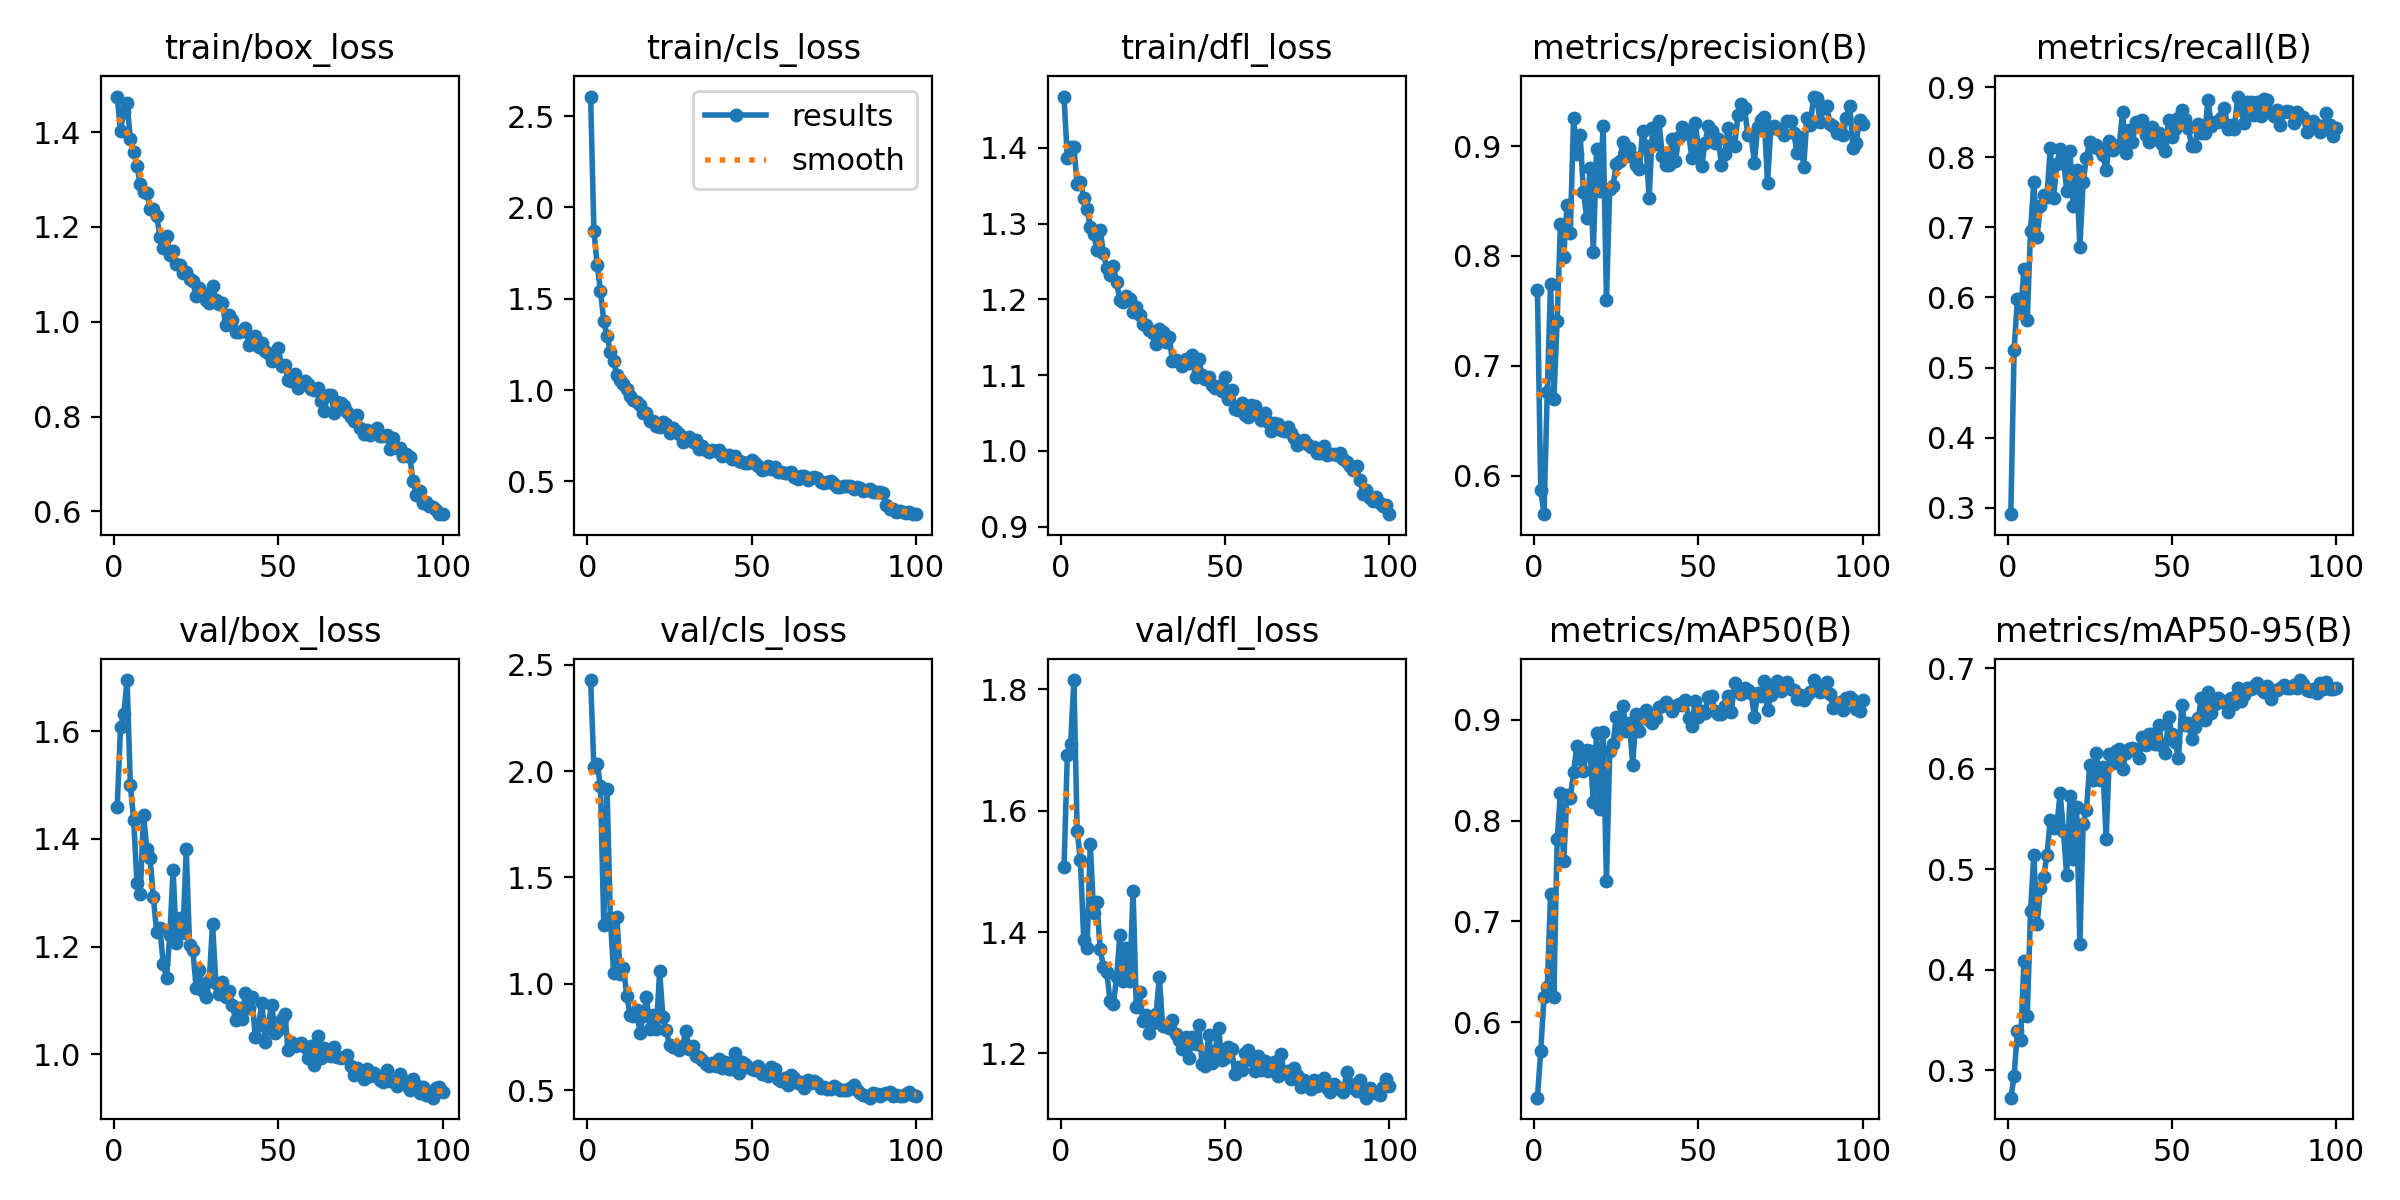

In [17]:
display(Image(filename=f"/kaggle/working/runs/detect/train2/results.png", width=1000)) 

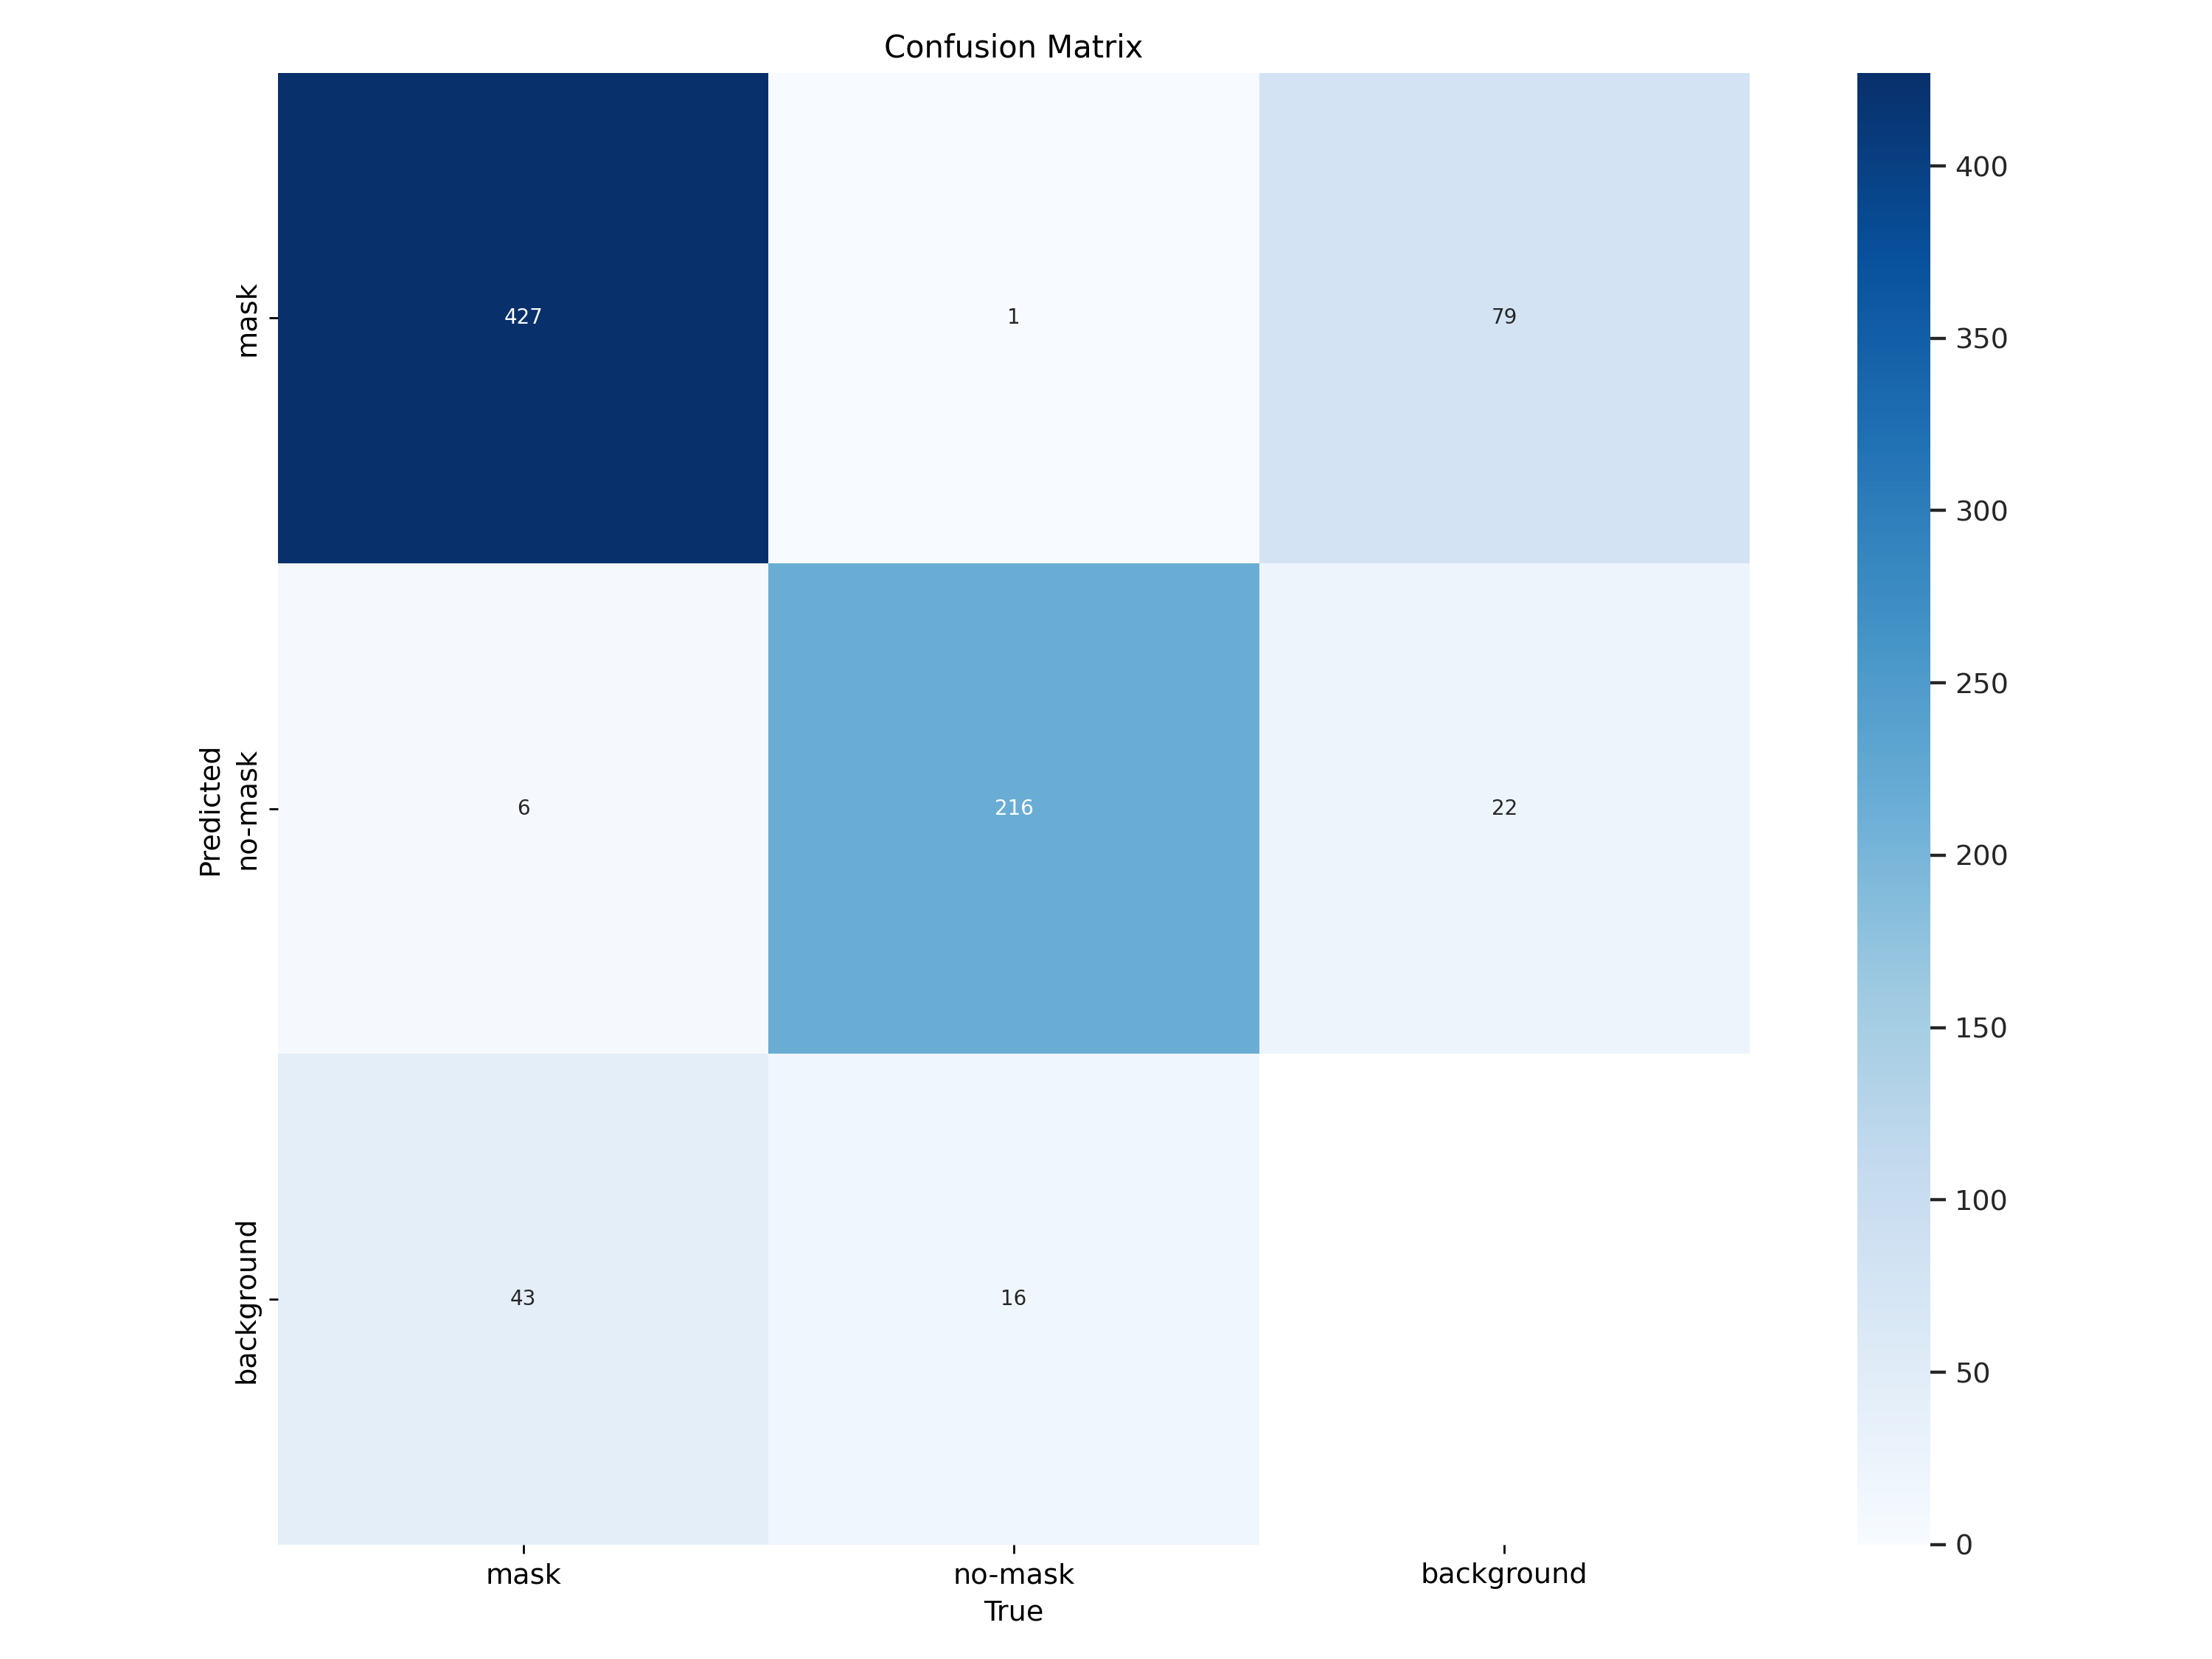

In [18]:
display(Image(filename=f"/kaggle/working/runs/detect/train2/confusion_matrix.png", width=1000)) 

In [19]:
model = YOLO("/kaggle/working/runs/detect/train2/weights/best.pt")  # load a custom model

## Validate the model
metrics = model.val() 

Ultralytics 8.3.127 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1582.3±828.3 MB/s, size: 57.6 KB)


val: Scanning /kaggle/working/Mask-Wearing-19/valid/labels.cache... 368 images, 56 backgrounds, 0 corrupt: 100%|██████████| 368/368 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 23/23 [00:03<00:00,  6.37it/s]


                   all        368        709      0.936       0.86      0.937      0.688
                  mask        182        476      0.923      0.824      0.924      0.661
               no-mask        158        233      0.948      0.897       0.95      0.714
Speed: 0.7ms preprocess, 3.6ms inference, 0.0ms loss, 1.6ms postprocess per image
Results saved to runs/detect/val



image 1/200 /kaggle/working/Mask-Wearing-19/test/images/0209-00176-076b1_jpg.rf.68ca9cf32fcefea879d225af4a7c3d44.jpg: 448x640 3 masks, 1 no-mask, 42.8ms
image 2/200 /kaggle/working/Mask-Wearing-19/test/images/0450908675_50159485_mutation-virus-chine-inquietude_jpg.rf.bda5fb5e13aac2a13eacab5ee4938218.jpg: 416x640 3 masks, 1 no-mask, 42.1ms
image 3/200 /kaggle/working/Mask-Wearing-19/test/images/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.11f76c39529068ff636fa2242afffa1d.jpg: 352x640 2 masks, 41.8ms
image 4/200 /kaggle/working/Mask-Wearing-19/test/images/0_Concern-In-China-As-Mystery-Virus-Spreads_jpg.rf.8817cb47eb5195e35bd6eee4bc773e68.jpg: 352x640 2 masks, 8.1ms
image 5/200 /kaggle/working/Mask-Wearing-19/test/images/1224331650_g_400-w_g_jpg.rf.4f6fa6b1a07d7011f5e32cf441b0d8d8.jpg: 608x640 4 masks, 42.1ms
image 6/200 /kaggle/working/Mask-Wearing-19/test/images/1224331650_g_400-w_g_jpg.rf.58aaec865ea99dac949f227a3ac8661b.jpg: 608x640 4 masks, 7.4ms
image 7/200 /kaggle/working/Ma

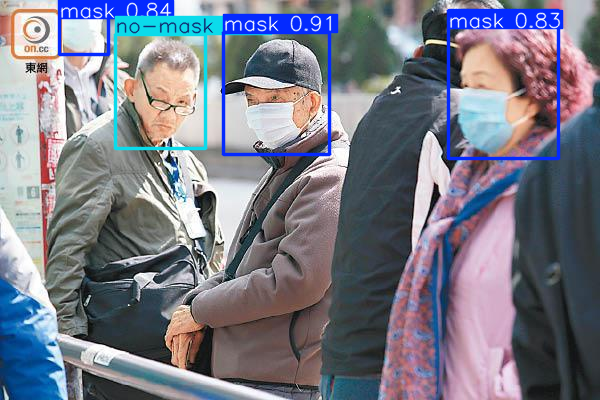

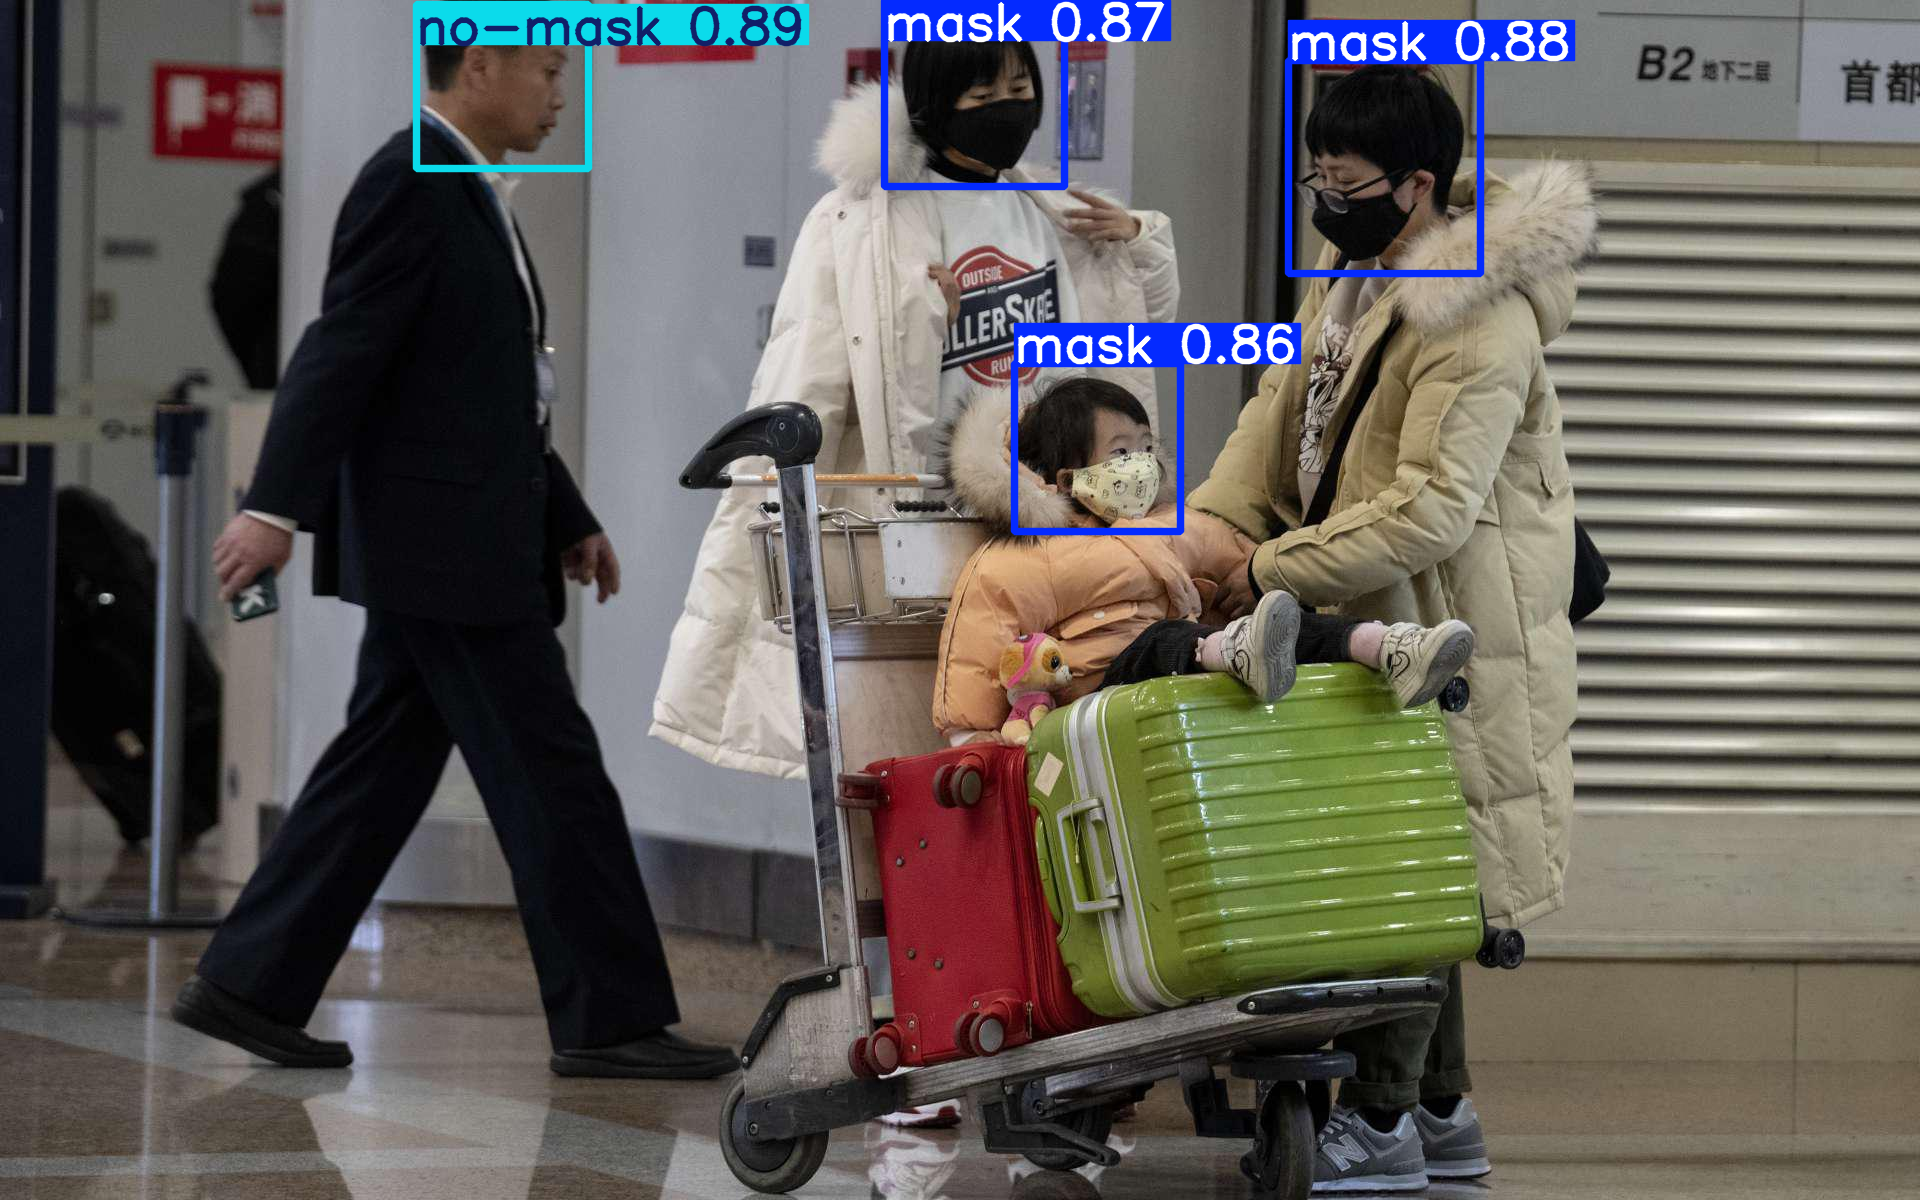

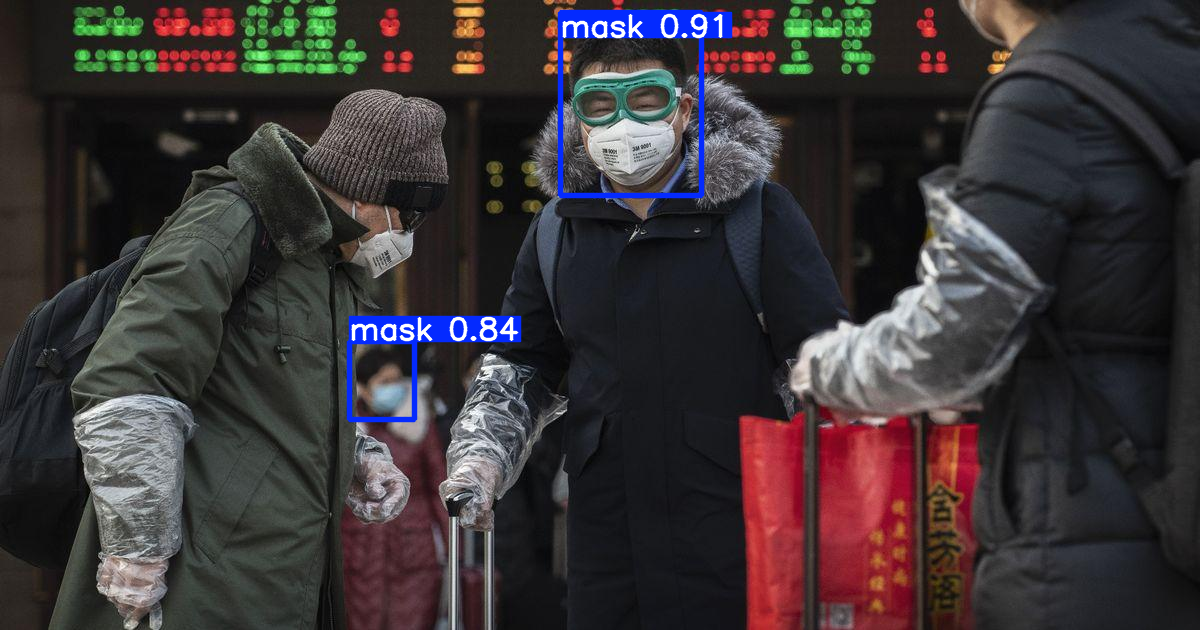

In [ ]:
results = model.predict(source='/kaggle/working/Mask-Wearing-19/test/images', imgsz=640, conf=0.5)
for result in results:
    result.show()

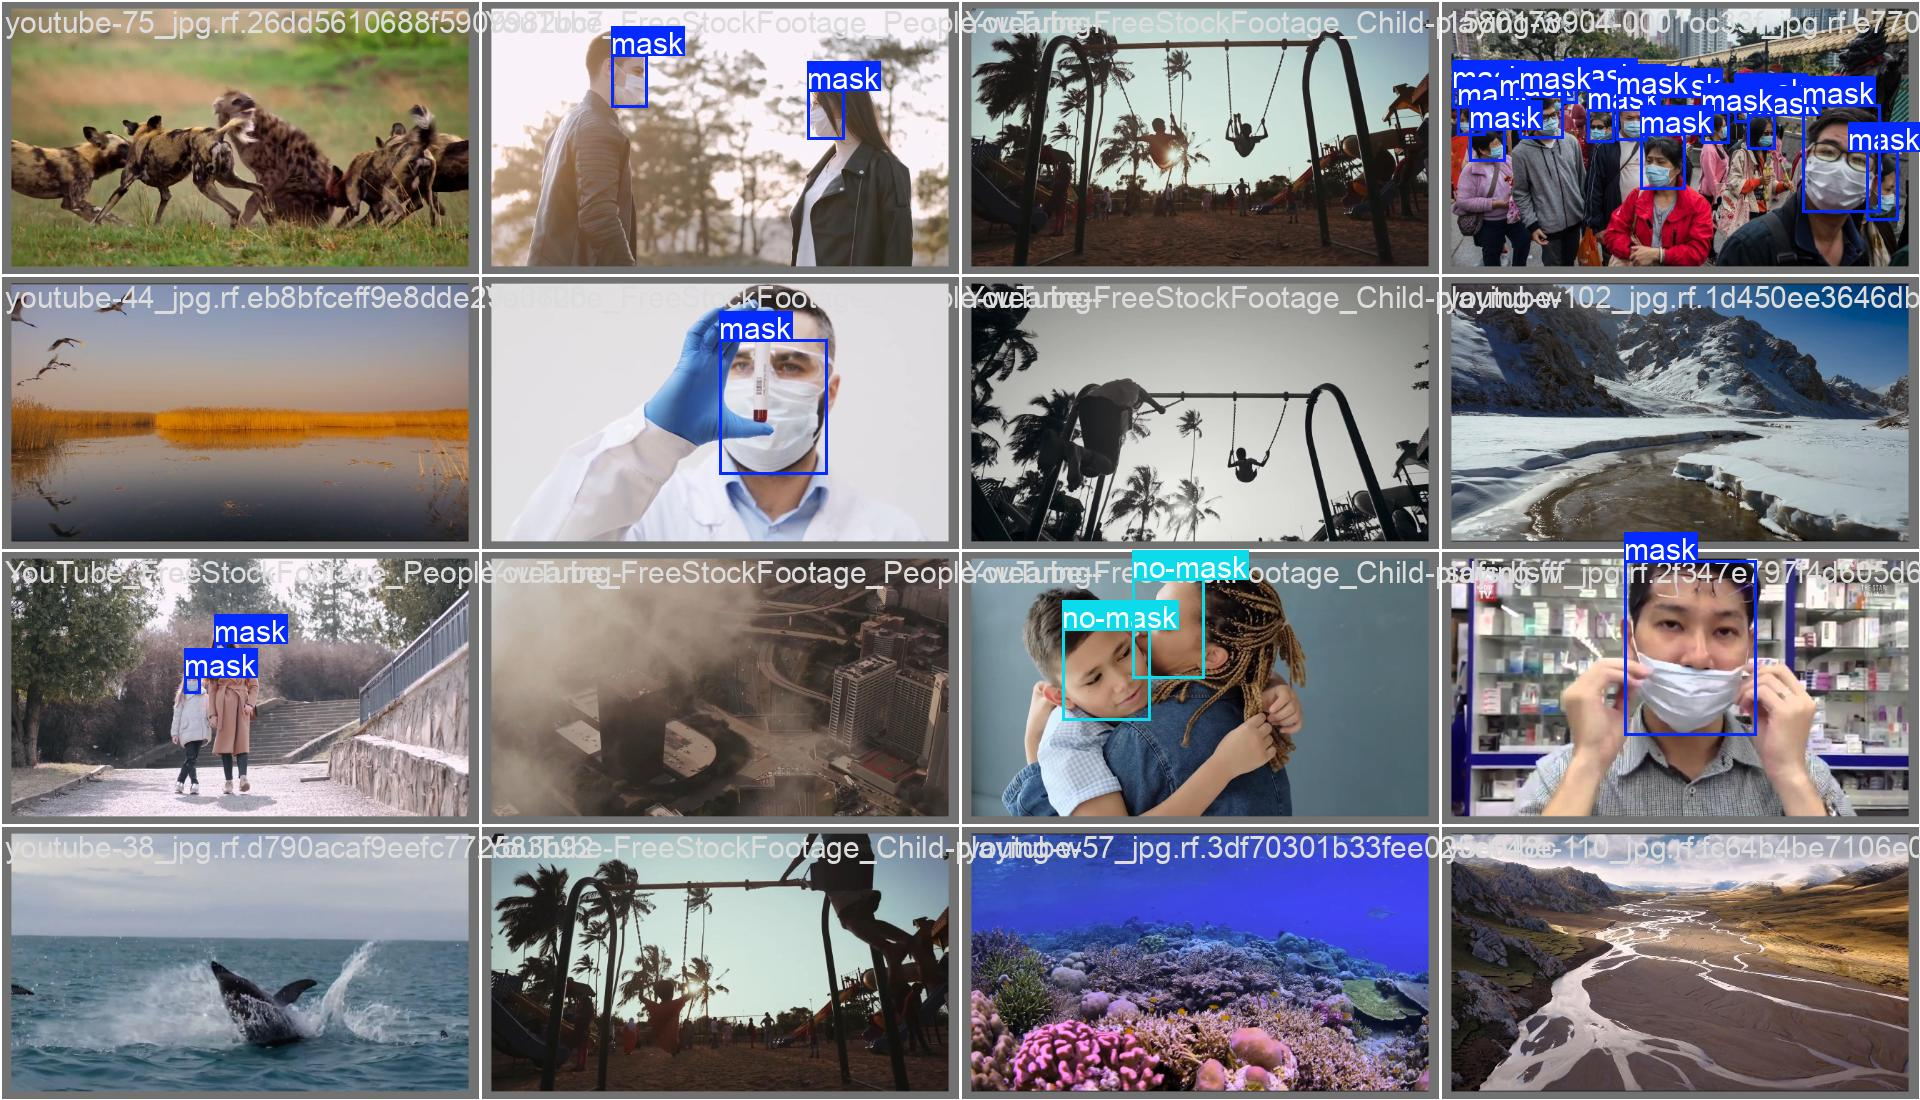

In [21]:
# Display inference on ALL test images
import glob
from IPython.display import Image, display
i = 0
for imageName in glob.glob("runs/detect/val/*.jpg"): #assuming JPG
    if i %20 == 0 :
        print("\n")
        display(Image(filename=imageName))
    i = i +1
